In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load from my code
from work.dataset.activitynet import ActivityNetDataset
from work.tools.utils import get_sample_frame_from_video

VIDEOS_INFO = '/imatge/amontes/work/activitynet/dataset/videos.json'
LABELS = '/imatge/amontes/work/activitynet/dataset/labels.txt'
VIDEOS_PATH = '/imatge/amontes/work/datasets/ActivityNet/v1.3/videos'

dataset = ActivityNetDataset(VIDEOS_INFO, LABELS, stored_videos_path=VIDEOS_PATH)

In [3]:
stats = dataset.get_stats()
total_duration = dataset.get_total_duration()/3600.
total_activity_duration = dataset.get_activity_duration()/3600.

print('Number of videos: {}'.format(stats['videos']['total']))
print('Training: {}\t Validation: {}\t Testing: {}\t'.format(
    stats['videos']['training'], stats['videos']['validation'], stats['videos']['testing'])
)
print('Number of labels: {}'.format(stats['labels']['total']))
print('Total hours of video: {:0.2f}'.format(total_duration))
print('Total hours of activities in video: {:0.2f}'.format(total_activity_duration))

Number of videos: 19757
Training: 9918	 Validation: 4861	 Testing: 4978	
Number of labels: 201
Total hours of video: 640.90
Total hours of activities in video: 311.95


# Stats

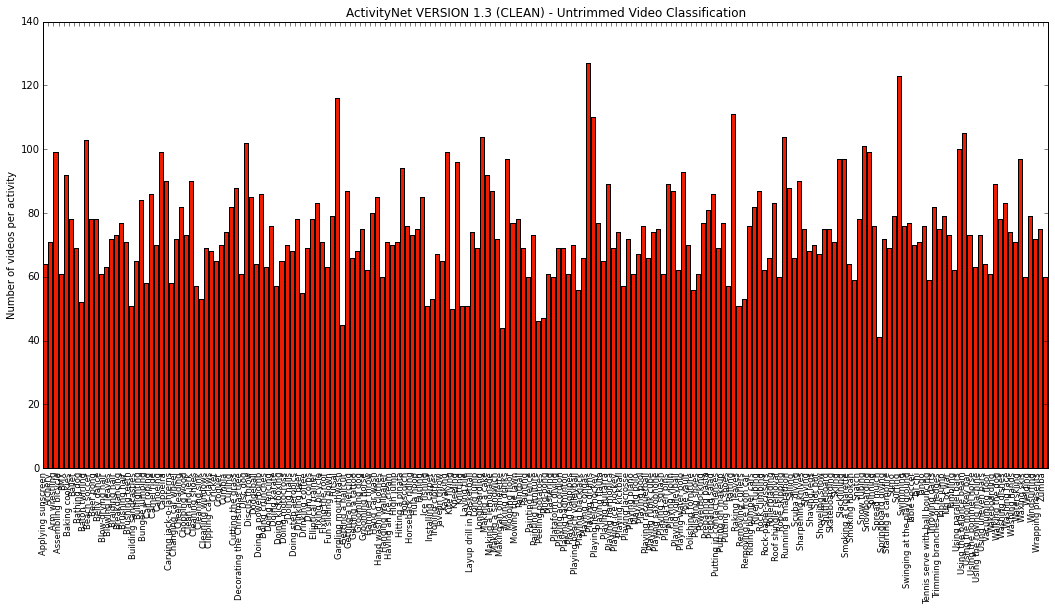

In [4]:
labels = dataset.get_labels()[1:]
labels.sort()
labels_count = [len(dataset.get_videos_from_label(label)) for label in labels]

plt.figure(num=None, figsize=(18, 8), dpi=100)
plt.bar(range(len(labels)), np.array(labels_count), color=(240.0/255.0,28/255.0,1/255.0))
plt.ylabel('Number of videos per activity')
plt.xticks(range(len(labels)), labels, rotation='vertical', size='small')
plt.title("ActivityNet VERSION 1.3 (CLEAN) - Untrimmed Video Classification")
plt.show()

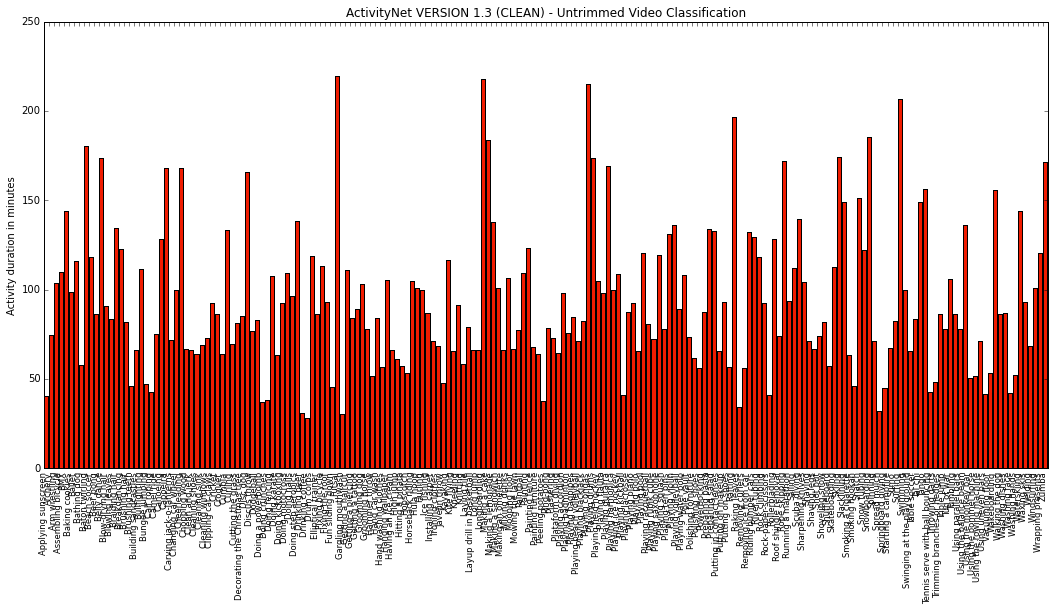

In [5]:
labels_duration = [dataset.get_activity_duration(label) for label in labels]

plt.figure(num=None, figsize=(18, 8), dpi=100)
plt.bar(range(len(labels)), np.array(labels_duration)/60., color=(240.0/255.0,28/255.0,1/255.0))
plt.ylabel('Activity duration in minutes')
plt.xticks(range(len(labels)), labels, rotation='vertical', size='small')
plt.title("ActivityNet VERSION 1.3 (CLEAN) - Untrimmed Video Classification")
plt.show()

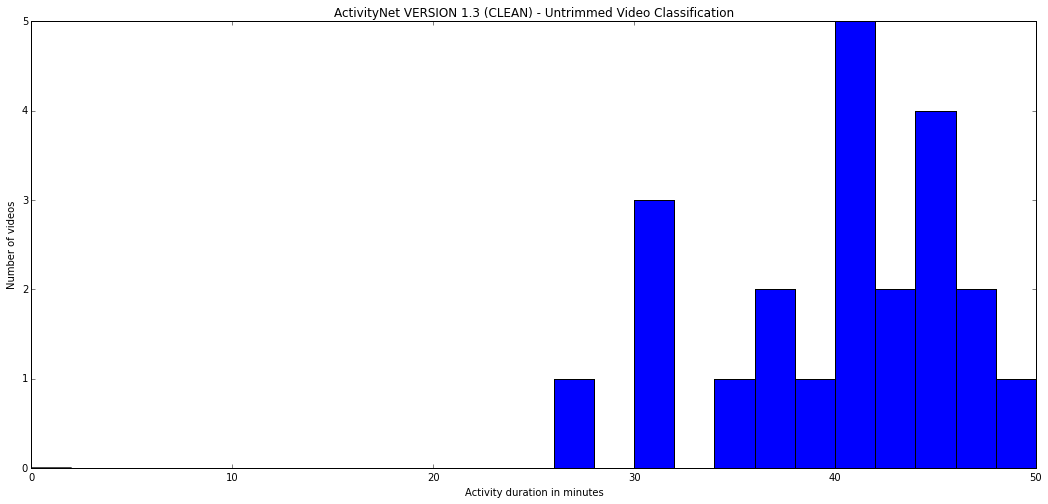

In [6]:
plt.figure(num=None, figsize=(18, 8), dpi=100)
plt.hist(np.array(labels_duration)/60., bins=25, range=(0, 50))
plt.title("ActivityNet VERSION 1.3 (CLEAN) - Untrimmed Video Classification")
plt.xlabel('Activity duration in minutes')
plt.ylabel('Number of videos')
plt.show()

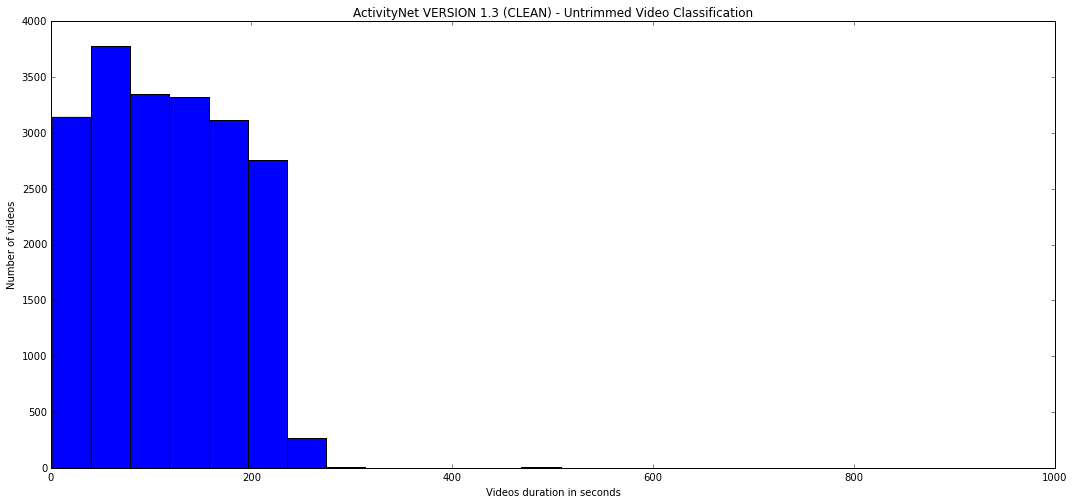

In [7]:
videos_duration = [video.duration for video in dataset.videos]
plt.figure(num=None, figsize=(18, 8), dpi=100)
plt.hist(np.array(videos_duration), bins=25)
plt.title("ActivityNet VERSION 1.3 (CLEAN) - Untrimmed Video Classification")
plt.xlabel('Videos duration in seconds')
plt.ylabel('Number of videos')
plt.show()

# Data Visualization

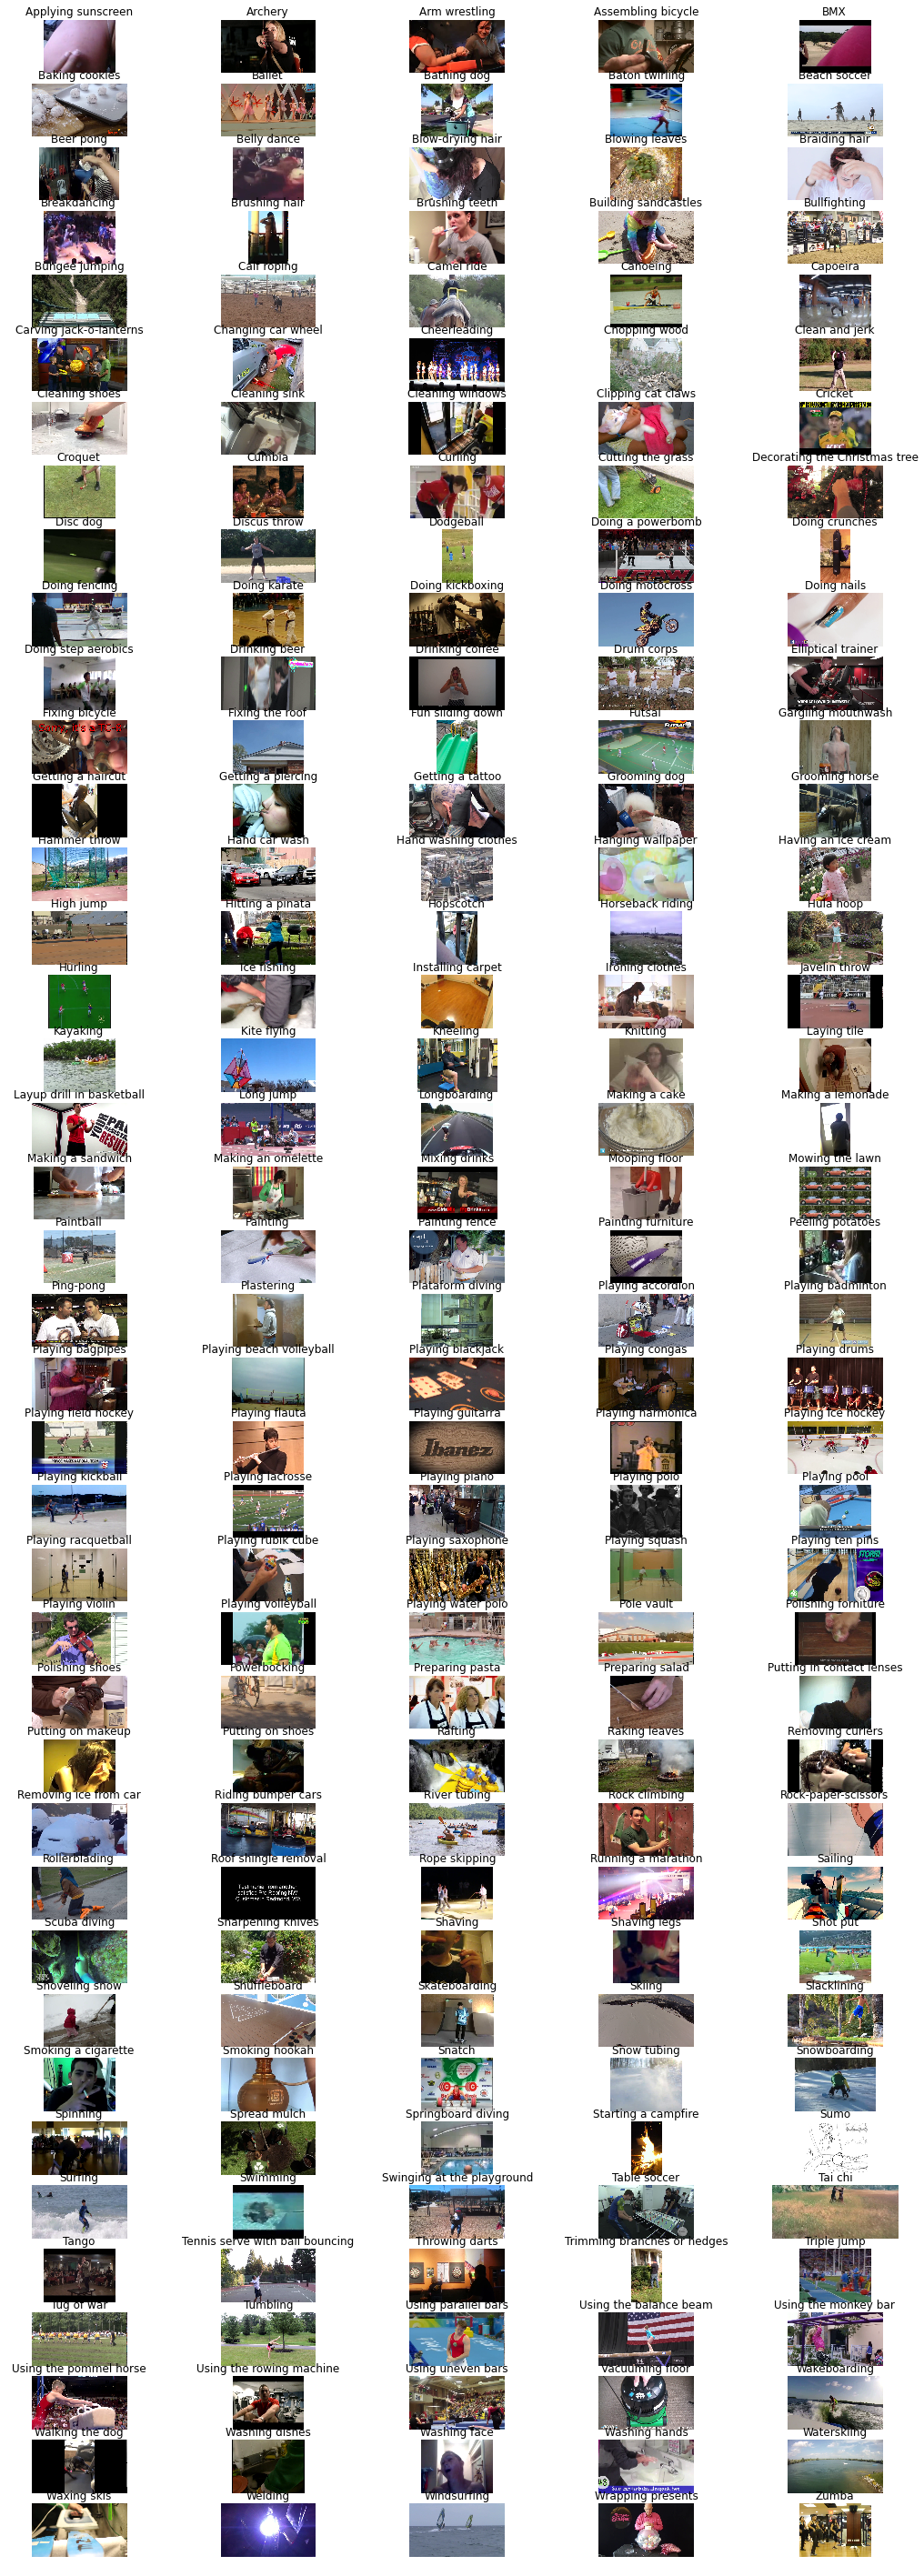

In [9]:
plt.figure(num=None, figsize=(18, 50), dpi=100)
idx = 1
for label in labels:
    keepdoing = True
    while keepdoing:
        try:
            video = random.choice(dataset.get_videos_from_label(label))
            img = get_sample_frame_from_video(
                video.video_id, 
                video.duration, 
                video.annotations[-1]['segment'][0],
                video.annotations[-1]['segment'][1],
                video.path
            )
            keepdoing = False
        except:
            keepdoing = True
    plt.subplot(40, 5, idx)
    idx += 1
    plt.imshow(img), plt.axis('off'), plt.title(label)
plt.show()